# Øving 6 - TMA4320 - Løsning

* **Veiledning:** Torsdag 12. mars og torsdag 19. mars, 2020, kl 0815-1000 i H3.
* **Innleveringsfrist:** Fredag 20. mars, 2020, kl 08:00.* 
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på Blackboardskjema for de tre kontrollspørsmålene i øvingen

For oppgavens beskrivelse, se oppgaveteksten.

**Oppgave 1** Skriv koden og test den ut på det enkle problemet

$$
u'=v,\ v'=-4u,\quad u(0)=1,\ v(0)=0,\ [t_0,t_{end}]=[0,2\pi]
$$

som har eksakt løsning $u(t)=\cos 2t$ og $v(t)=-2\sin 2t$. Merk at her er $y(t)=[u(t),v(t)]^T$.

Skriv koden og test den ut på det enkle problemet

$$
u'=v,\ v'=-4u,\quad u(0)=1,\ v(0)=0,\ [t_0,t_{end}]=[0,2\pi]
$$

som har eksakt løsning $u(t)=\cos 2t$ og $v(t)=-2\sin 2t$. Merk at her er $y(t)=[u(t),v(t)]^T$.

Lag 3 plott
* Et som viser de to komponentene $u$ og $v$ beregnet av metoden som funksjon av $t$ i samme plott
* Et som viser den virkelige feilen som funksjon av $t$ (bruk kjent eksakt løsning)
* Et som viser hvordan skrittlengden varierer med som funksjon av $t$

Skriv ut statistikk også, dvs antall skritt, funksjonsevalueringer og forkastede skritt.


**Oppgave 2** Anvend funksjonen på Brusselator-problemet nedenfor. Sett pessimistfaktor $\alpha=0.9$,
$t_0=0$, $t_{end}=20$, og $tol=10^{-5}$. La $h0=0.1$.

\begin{align*}
u' &= 1 + u^2 v - 4 u, & u(0)&=1 \\
v' &= 3u - u^2 v,  & v(0)&=2.9
\end{align*}

Lag 3 plott
* Et som viser de to komponentene $u$ og $v$  som funksjon av $t$ is samme plott
* Et som plotter $v$ mot $u$ (faseplott) dvs $u$ langs $x$-aksen og $v$ langs $y$-aksen.
* Et som viser hvordan skrittlengden varierer med som funksjon av $t$

**Kontrollspørsmål** Du blir her bedt om å rapportere statistikk fra eksperimentet i Oppgave 2.
Antall skritt koden din bruker, antall funksjonsevalueringer (feval) og antall forkastede skritt.

**Forslag til kode som implementerer funksjonen**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math

def BogackiShampine(t0,tend,y0,f,h0,tol):
    fevals=0
    rejects=0
    t=t0
    h=h0
    k1=f(t0,y0)
    fevals+=1
    T={0:t0}
    Y={0:y0}
    n=0
    while tend-t>1e-10:
        h=min(h,tend-t)
        T[n+1] = T[n]+h
        k2 = f(T[n]+0.5*h,Y[n]+0.5*h*k1)
        k3 = f(T[n]+0.75*h,Y[n]+0.75*h*k2)
        fevals+=2
        Y[n+1] = Y[n] + h/9.0*(2*k1+3*k2+4*k3)
        k4 = f(T[n+1],Y[n+1])
        fevals+=1
        Z = Y[n] +1.0/24.0*h*(7.*k1+6.*k2+8.*k3+3.*k4)
        est = np.linalg.norm(Y[n+1]-Z)
        accept = est < tol
        if accept:
            n+=1
            k1=k4
            t=T[n]
        else:
            rejects+=1

        h=0.9*h*(tol/est)**(1.0/3.0)
    Ta = np.array([T[i] for i in range(len(T))])
    Ya = np.array([Y[i] for i in range(len(Y))])
    stats = {'steps' : n, 'fevals' : fevals, 'rejects' : rejects}
    return Ta,Ya,stats

**Kodecelle for Oppgave 1** følger

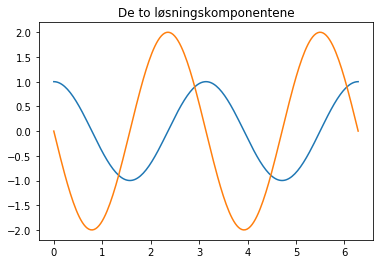

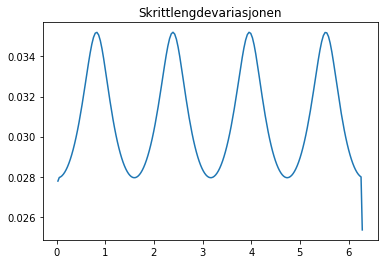

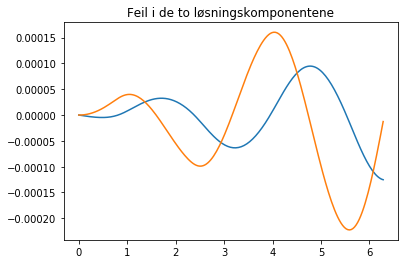

stats {'steps': 205, 'fevals': 618, 'rejects': 1}


In [20]:
import numpy as np

def LinearTestProblem(t,y):
    return np.array([y[1],-4*y[0]])

t0=0
tend=2*np.pi
h0=0.2
tol=1e-5
y0=np.array([1.0,0.0])
T,Y,stats = BogackiShampine(t0,tend,y0,LinearTestProblem,h0,tol)

plt.plot(T,Y[:,0])
plt.plot(T,Y[:,1])
plt.title('De to løsningskomponentene')
plt.show()
plt.plot(T[1:],np.diff(T))
plt.title('Skrittlengdevariasjonen')
plt.show()
Err1 = Y[:,0]-np.cos(2*T)
Err2 = Y[:,1]+2*np.sin(2*T)
plt.plot(T,Err1)
plt.plot(T,Err2)
plt.title('Feil i de to løsningskomponentene')
plt.show()
print('stats',stats)


**Kodecelle for Oppgave 2** følger

stats= {'steps': 424, 'fevals': 1336, 'rejects': 21}


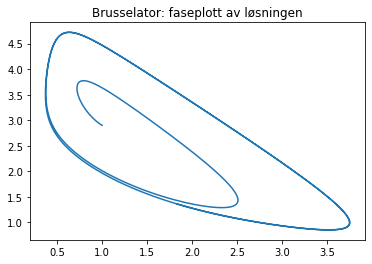

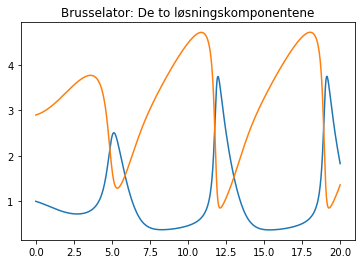

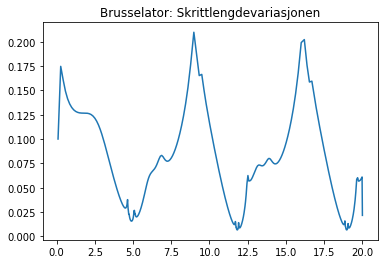

In [29]:
def Brusselator(t,y):
    return np.array([1+y[0]**2*y[1]-4*y[0],3*y[0]-y[0]**2*y[1]])

t0=0
tend=20
h0=0.1
tol=1e-5
y0=np.array([1.0,2.9])
T,Y,stats = BogackiShampine(t0,tend,y0,Brusselator,h0,tol)
print('stats=',stats)
plt.plot(Y[:,0],Y[:,1])
plt.title('Brusselator: faseplott av løsningen')
plt.show()
plt.plot(T,Y[:,0])
plt.plot(T,Y[:,1])
plt.title('Brusselator: De to løsningskomponentene')
plt.show()
plt.plot(T[1:],np.diff(T))
plt.title('Brusselator: Skrittlengdevariasjonen')
plt.show()

